In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import pytz
import pvlib

In [2]:
inv_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/INVERTER/"
gti_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/BSRNminGTI/"
ghi_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/BSRNmin/"


In [17]:
dfCDT  = pd.read_csv(inv_path + 'CDT.csv') 


In [8]:
dfCDT

,TIMESTAMP,E_tot,V_grid,I_grid,P_grid,F_grid,P_in1,V_in1,I_in1,P_in2,V_in2,I_in2,T_inverter,T_booster,R_iso
0,2017-07-04 10:45:00,2193.921,234.6536,6.196396,1434.9640,59.98176,1479.3440,319.4513,4.700523,0.0,0,0,39.08350,33.51683,5.0
1,2017-07-04 10:46:00,2193.947,234.8455,6.196651,1439.2920,59.99952,1484.0010,319.8006,4.718031,0.0,0,0,39.08350,33.30969,5.0
2,2017-07-04 10:47:00,2193.972,234.7815,6.211050,1441.4260,60.00360,1486.0060,319.7704,4.747102,0.0,0,0,39.21859,33.41356,5.0
3,2017-07-04 10:48:00,2193.993,234.6642,6.275977,1450.1460,60.00192,1495.5130,320.0895,4.776174,0.0,0,0,39.24561,33.30969,5.0
4,2017-07-04 10:49:00,2194.021,234.4241,6.284834,1456.0430,59.98608,1501.0760,320.4254,4.810109,0.0,0,0,39.24561,33.15329,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828685,2021-02-11 15:09:00,13115.830,215.2951,2.661140,552.9396,59.97337,570.0408,311.8500,1.941638,0.0,0,0,44.47314,38.33249,5.0
1828686,2021-02-11 15:10:00,13115.840,215.6855,2.843410,590.6448,60.01645,608.0389,312.9937,2.030582,0.0,0,0,44.47314,38.43271,5.0
1828687,2021-02-11 15:11:00,13115.840,215.6725,2.846778,598.1732,60.00326,615.9943,313.4791,2.041984,0.0,0,0,44.40621,38.42018,5.0
1828688,2021-02-11 15:12:00,13115.860,215.6638,2.798108,597.4203,59.97649,615.8973,313.7646,2.058465,0.0,0,0,44.31250,38.33249,5.0


In [18]:
dfCDT['TIMESTAMP'] = dfCDT['TIMESTAMP'].astype(np.datetime64)


In [10]:
dfCDT

,TIMESTAMP,E_tot,V_grid,I_grid,P_grid,F_grid,P_in1,V_in1,I_in1,P_in2,V_in2,I_in2,T_inverter,T_booster,R_iso
0,2017-07-04 10:45:00,2193.921,234.6536,6.196396,1434.9640,59.98176,1479.3440,319.4513,4.700523,0.0,0,0,39.08350,33.51683,5.0
1,2017-07-04 10:46:00,2193.947,234.8455,6.196651,1439.2920,59.99952,1484.0010,319.8006,4.718031,0.0,0,0,39.08350,33.30969,5.0
2,2017-07-04 10:47:00,2193.972,234.7815,6.211050,1441.4260,60.00360,1486.0060,319.7704,4.747102,0.0,0,0,39.21859,33.41356,5.0
3,2017-07-04 10:48:00,2193.993,234.6642,6.275977,1450.1460,60.00192,1495.5130,320.0895,4.776174,0.0,0,0,39.24561,33.30969,5.0
4,2017-07-04 10:49:00,2194.021,234.4241,6.284834,1456.0430,59.98608,1501.0760,320.4254,4.810109,0.0,0,0,39.24561,33.15329,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828685,2021-02-11 15:09:00,13115.830,215.2951,2.661140,552.9396,59.97337,570.0408,311.8500,1.941638,0.0,0,0,44.47314,38.33249,5.0
1828686,2021-02-11 15:10:00,13115.840,215.6855,2.843410,590.6448,60.01645,608.0389,312.9937,2.030582,0.0,0,0,44.47314,38.43271,5.0
1828687,2021-02-11 15:11:00,13115.840,215.6725,2.846778,598.1732,60.00326,615.9943,313.4791,2.041984,0.0,0,0,44.40621,38.42018,5.0
1828688,2021-02-11 15:12:00,13115.860,215.6638,2.798108,597.4203,59.97649,615.8973,313.7646,2.058465,0.0,0,0,44.31250,38.33249,5.0


In [19]:
dfCDT = dfCDT.set_index('TIMESTAMP')


In [12]:
dfCDT

,E_tot,V_grid,I_grid,P_grid,F_grid,P_in1,V_in1,I_in1,P_in2,V_in2,I_in2,T_inverter,T_booster,R_iso
TIMESTAMP,,,,,,,,,,,,,,
2017-07-04 10:45:00,2193.921,234.6536,6.196396,1434.9640,59.98176,1479.3440,319.4513,4.700523,0.0,0,0,39.08350,33.51683,5.0
2017-07-04 10:46:00,2193.947,234.8455,6.196651,1439.2920,59.99952,1484.0010,319.8006,4.718031,0.0,0,0,39.08350,33.30969,5.0
2017-07-04 10:47:00,2193.972,234.7815,6.211050,1441.4260,60.00360,1486.0060,319.7704,4.747102,0.0,0,0,39.21859,33.41356,5.0
2017-07-04 10:48:00,2193.993,234.6642,6.275977,1450.1460,60.00192,1495.5130,320.0895,4.776174,0.0,0,0,39.24561,33.30969,5.0
2017-07-04 10:49:00,2194.021,234.4241,6.284834,1456.0430,59.98608,1501.0760,320.4254,4.810109,0.0,0,0,39.24561,33.15329,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-11 15:09:00,13115.830,215.2951,2.661140,552.9396,59.97337,570.0408,311.8500,1.941638,0.0,0,0,44.47314,38.33249,5.0
2021-02-11 15:10:00,13115.840,215.6855,2.843410,590.6448,60.01645,608.0389,312.9937,2.030582,0.0,0,0,44.47314,38.43271,5.0
2021-02-11 15:11:00,13115.840,215.6725,2.846778,598.1732,60.00326,615.9943,313.4791,2.041984,0.0,0,0,44.40621,38.42018,5.0


In [21]:
dfCDT

,E_tot,V_grid,I_grid,P_grid,F_grid,P_in1,V_in1,I_in1,P_in2,V_in2,I_in2,T_inverter,T_booster,R_iso
TIMESTAMP,,,,,,,,,,,,,,
2017-07-04 10:45:00,2193.921,234.6536,6.196396,1434.9640,59.98176,1479.3440,319.4513,4.700523,0.0,0,0,39.08350,33.51683,5.0
2017-07-04 10:46:00,2193.947,234.8455,6.196651,1439.2920,59.99952,1484.0010,319.8006,4.718031,0.0,0,0,39.08350,33.30969,5.0
2017-07-04 10:47:00,2193.972,234.7815,6.211050,1441.4260,60.00360,1486.0060,319.7704,4.747102,0.0,0,0,39.21859,33.41356,5.0
2017-07-04 10:48:00,2193.993,234.6642,6.275977,1450.1460,60.00192,1495.5130,320.0895,4.776174,0.0,0,0,39.24561,33.30969,5.0
2017-07-04 10:49:00,2194.021,234.4241,6.284834,1456.0430,59.98608,1501.0760,320.4254,4.810109,0.0,0,0,39.24561,33.15329,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-11 15:09:00,13115.830,215.2951,2.661140,552.9396,59.97337,570.0408,311.8500,1.941638,0.0,0,0,44.47314,38.33249,5.0
2021-02-11 15:10:00,13115.840,215.6855,2.843410,590.6448,60.01645,608.0389,312.9937,2.030582,0.0,0,0,44.47314,38.43271,5.0
2021-02-11 15:11:00,13115.840,215.6725,2.846778,598.1732,60.00326,615.9943,313.4791,2.041984,0.0,0,0,44.40621,38.42018,5.0


In [22]:
dfCDT.index.drop_duplicates()

DatetimeIndex(['2017-07-04 10:45:00', '2017-07-04 10:46:00',
               '2017-07-04 10:47:00', '2017-07-04 10:48:00',
               '2017-07-04 10:49:00', '2017-07-04 10:50:00',
               '2017-07-04 10:51:00', '2017-07-04 10:52:00',
               '2017-07-04 10:53:00', '2017-07-04 10:54:00',
               ...
               '2021-02-11 15:04:00', '2021-02-11 15:05:00',
               '2021-02-11 15:06:00', '2021-02-11 15:07:00',
               '2021-02-11 15:08:00', '2021-02-11 15:09:00',
               '2021-02-11 15:10:00', '2021-02-11 15:11:00',
               '2021-02-11 15:12:00', '2021-02-11 15:13:00'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=1828509, freq=None)

In [23]:
dfCDT

,E_tot,V_grid,I_grid,P_grid,F_grid,P_in1,V_in1,I_in1,P_in2,V_in2,I_in2,T_inverter,T_booster,R_iso
TIMESTAMP,,,,,,,,,,,,,,
2017-07-04 10:45:00,2193.921,234.6536,6.196396,1434.9640,59.98176,1479.3440,319.4513,4.700523,0.0,0,0,39.08350,33.51683,5.0
2017-07-04 10:46:00,2193.947,234.8455,6.196651,1439.2920,59.99952,1484.0010,319.8006,4.718031,0.0,0,0,39.08350,33.30969,5.0
2017-07-04 10:47:00,2193.972,234.7815,6.211050,1441.4260,60.00360,1486.0060,319.7704,4.747102,0.0,0,0,39.21859,33.41356,5.0
2017-07-04 10:48:00,2193.993,234.6642,6.275977,1450.1460,60.00192,1495.5130,320.0895,4.776174,0.0,0,0,39.24561,33.30969,5.0
2017-07-04 10:49:00,2194.021,234.4241,6.284834,1456.0430,59.98608,1501.0760,320.4254,4.810109,0.0,0,0,39.24561,33.15329,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-11 15:09:00,13115.830,215.2951,2.661140,552.9396,59.97337,570.0408,311.8500,1.941638,0.0,0,0,44.47314,38.33249,5.0
2021-02-11 15:10:00,13115.840,215.6855,2.843410,590.6448,60.01645,608.0389,312.9937,2.030582,0.0,0,0,44.47314,38.43271,5.0
2021-02-11 15:11:00,13115.840,215.6725,2.846778,598.1732,60.00326,615.9943,313.4791,2.041984,0.0,0,0,44.40621,38.42018,5.0


In [4]:
dfCDTnosync = dfCDT[dfCDT.index < '2018-11-27 00:00:00']  # this part is in BRT (GMT - 3)


AttributeError: 'DatetimeIndex' object has no attribute 'index'

In [24]:
dcac = ['P_in1', 
        'P_grid']

In [26]:
tzBRA = 'Etc/GMT+3'
tzETC = 'Etc/GMT-0'

dfCDT  = pd.read_csv(inv_path + 'CDT.csv') 
dfCDT['TIMESTAMP'] = dfCDT['TIMESTAMP'].astype(np.datetime64)
dfCDT = dfCDT.set_index('TIMESTAMP')
#dfCDT = dfCDT.index.drop_duplicates()
dfCDTnosync = dfCDT[dfCDT.index < '2018-11-27 00:00:00']  # this part is in BRT (GMT - 3)
dfCDTnosync.index = dfCDTnosync.index.tz_localize(tzBRA)
dfCDTnosync.index = dfCDTnosync.index.tz_convert(tzETC)
dfCDTsync = dfCDT[dfCDT.index > '2018-11-28 00:00:00']  #  # this part is in  (GMT - 0)
dfCDTsync.index = dfCDTsync.index.tz_localize(tzETC)
dfCDTsync = [dfCDTnosync, dfCDTsync]
dfCDTsync = pd.concat(dfCDTsync)
dfCDTsync = dfCDTsync
dfPCDT = dfCDTsync[dcac]
dfPCDT = dfPCDT.loc['2018-01-01 00:00:00':'2021-01-01 00:00:00']

In [28]:
dfPCDT.index

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-01 00:01:00+00:00',
               '2018-01-01 00:02:00+00:00', '2018-01-01 00:03:00+00:00',
               '2018-01-01 00:04:00+00:00', '2018-01-01 00:05:00+00:00',
               '2018-01-01 00:06:00+00:00', '2018-01-01 00:07:00+00:00',
               '2018-01-01 00:08:00+00:00', '2018-01-01 00:09:00+00:00',
               ...
               '2020-12-31 23:50:00+00:00', '2020-12-31 23:51:00+00:00',
               '2020-12-31 23:52:00+00:00', '2020-12-31 23:53:00+00:00',
               '2020-12-31 23:54:00+00:00', '2020-12-31 23:55:00+00:00',
               '2020-12-31 23:56:00+00:00', '2020-12-31 23:57:00+00:00',
               '2020-12-31 23:58:00+00:00', '2020-12-31 23:59:00+00:00'],
              dtype='datetime64[ns, Etc/GMT-0]', name='TIMESTAMP', length=1512451, freq=None)

In [29]:
unique = dfPCDT.index.drop_duplicates()

In [30]:
unique

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-01 00:01:00+00:00',
               '2018-01-01 00:02:00+00:00', '2018-01-01 00:03:00+00:00',
               '2018-01-01 00:04:00+00:00', '2018-01-01 00:05:00+00:00',
               '2018-01-01 00:06:00+00:00', '2018-01-01 00:07:00+00:00',
               '2018-01-01 00:08:00+00:00', '2018-01-01 00:09:00+00:00',
               ...
               '2020-12-31 23:50:00+00:00', '2020-12-31 23:51:00+00:00',
               '2020-12-31 23:52:00+00:00', '2020-12-31 23:53:00+00:00',
               '2020-12-31 23:54:00+00:00', '2020-12-31 23:55:00+00:00',
               '2020-12-31 23:56:00+00:00', '2020-12-31 23:57:00+00:00',
               '2020-12-31 23:58:00+00:00', '2020-12-31 23:59:00+00:00'],
              dtype='datetime64[ns, Etc/GMT-0]', name='TIMESTAMP', length=1512270, freq=None)

In [32]:
new = dfPCDT.loc[unique]

In [33]:
new

,P_in1,P_grid
TIMESTAMP,,
2018-01-01 00:00:00+00:00,0.0,0.0
2018-01-01 00:01:00+00:00,0.0,0.0
2018-01-01 00:02:00+00:00,0.0,0.0
2018-01-01 00:03:00+00:00,0.0,0.0
2018-01-01 00:04:00+00:00,0.0,0.0
...,...,...
2020-12-31 23:55:00+00:00,0.0,0.0
2020-12-31 23:56:00+00:00,0.0,0.0
2020-12-31 23:57:00+00:00,0.0,0.0


In [34]:
dfCDT  = pd.read_csv(inv_path + 'CDT.csv') 
dfCDT['TIMESTAMP'] = dfCDT['TIMESTAMP'].astype(np.datetime64)
dfCDT = dfCDT.drop_duplicates(subset=['TIMESTAMP'])
dfCDT = dfCDT.set_index('TIMESTAMP')
#dfCDT = dfCDT.index.drop_duplicates()
dfCDTnosync = dfCDT[dfCDT.index < '2018-11-27 00:00:00']  # this part is in BRT (GMT - 3)
dfCDTnosync.index = dfCDTnosync.index.tz_localize(tzBRA)
dfCDTnosync.index = dfCDTnosync.index.tz_convert(tzETC)
dfCDTsync = dfCDT[dfCDT.index > '2018-11-28 00:00:00']  #  # this part is in  (GMT - 0)
dfCDTsync.index = dfCDTsync.index.tz_localize(tzETC)
dfCDTsync = [dfCDTnosync, dfCDTsync]
dfCDTsync = pd.concat(dfCDTsync)
dfPCDT = dfCDTsync[dcac]
dfPCDT = dfPCDT.loc['2018-01-01 00:00:00':'2021-01-01 00:00:00']
dfPCDT = dfPCDT.rename(columns={"P_in1": "Paccdt", "P_grid": "Pdccdt"})
dfPCDT.shape

(1512270, 2)

In [35]:
dfPCDT

,Paccdt,Pdccdt
TIMESTAMP,,
2018-01-01 00:00:00+00:00,0.0,0.0
2018-01-01 00:01:00+00:00,0.0,0.0
2018-01-01 00:02:00+00:00,0.0,0.0
2018-01-01 00:03:00+00:00,0.0,0.0
2018-01-01 00:04:00+00:00,0.0,0.0
...,...,...
2020-12-31 23:55:00+00:00,0.0,0.0
2020-12-31 23:56:00+00:00,0.0,0.0
2020-12-31 23:57:00+00:00,0.0,0.0


In [36]:
dfCDTA  = pd.read_csv(inv_path + 'CDTA.csv') 
dfCDTA['TIMESTAMP'] = dfCDTA['TIMESTAMP'].astype(np.datetime64)
dfCDTA = dfCDTA.drop_duplicates(subset=['TIMESTAMP'])
dfCDTA = dfCDTA.set_index('TIMESTAMP')
dfCDTAnosync = dfCDTA[dfCDTA.index < '2018-11-27 00:00:00']  # this part is in BRT (GMT - 3)
dfCDTAnosync.index = dfCDTAnosync.index.tz_localize(tzBRA)
dfCDTAnosync.index = dfCDTAnosync.index.tz_convert(tzETC)
dfCDTAsync = dfCDTA[dfCDTA.index > '2018-11-28 00:00:00']  #  # this part is in  (GMT - 0)
dfCDTAsync.index = dfCDTAsync.index.tz_localize(tzETC)
dfCDTAsync = [dfCDTAnosync, dfCDTAsync]
dfCDTAsync = pd.concat(dfCDTAsync)
dfPCDTA = dfCDTAsync[dcac]
dfPCDTA = dfPCDTA.loc['2018-01-01 00:00:00':'2021-01-01 00:00:00']
dfPCDTA = dfPCDTA.rename(columns={"P_in1": "Paccdta", "P_grid": "Pdccdta"})
dfPCDTA.shape

(1512270, 2)

In [37]:
dfPCDTA

,Paccdta,Pdccdta
TIMESTAMP,,
2018-01-01 00:00:00+00:00,0.0,0.0
2018-01-01 00:01:00+00:00,0.0,0.0
2018-01-01 00:02:00+00:00,0.0,0.0
2018-01-01 00:03:00+00:00,0.0,0.0
2018-01-01 00:04:00+00:00,0.0,0.0
...,...,...
2020-12-31 23:55:00+00:00,0.0,0.0
2020-12-31 23:56:00+00:00,0.0,0.0
2020-12-31 23:57:00+00:00,0.0,0.0


In [38]:
dfPSI  = pd.read_csv(inv_path + 'PSI.csv') 
dfPSI['TIMESTAMP'] = dfPSI['TIMESTAMP'].astype(np.datetime64)
dfPSI = dfPSI.drop_duplicates(subset=['TIMESTAMP'])
dfPSI = dfPSI.set_index('TIMESTAMP')
#dfPSI = dfPSI.index.drop_duplicates()
dfPSInosync = dfPSI[dfPSI.index < '2018-11-27 00:00:00']  # this part is in BRT (GMT - 3)
dfPSInosync.index = dfPSInosync.index.tz_localize(tzBRA)
dfPSInosync.index = dfPSInosync.index.tz_convert(tzETC)
dfPSIsync = dfPSI[dfPSI.index > '2018-11-28 00:00:00']  #  # this part is in  (GMT - 0)
dfPSIsync.index = dfPSIsync.index.tz_localize(tzETC)
dfPSIsync = [dfPSInosync, dfPSIsync]
dfPSIsync = pd.concat(dfPSIsync)
dfPPSI = dfPSIsync[dcac]
dfPPSI = dfPPSI.loc['2018-01-01 00:00:00':'2021-01-01 00:00:00']
dfPPSI = dfPPSI.rename(columns={"P_in1": "Pacpsi", "P_grid": "Pdcpsi"})
dfPPSI.shape

(1514445, 2)

In [39]:
dfPPSI

,Pacpsi,Pdcpsi
TIMESTAMP,,
2018-01-01 00:00:00+00:00,0.0,0.0
2018-01-01 00:01:00+00:00,0.0,0.0
2018-01-01 00:02:00+00:00,0.0,0.0
2018-01-01 00:03:00+00:00,0.0,0.0
2018-01-01 00:04:00+00:00,0.0,0.0
...,...,...
2020-12-31 23:55:00+00:00,0.0,0.0
2020-12-31 23:56:00+00:00,0.0,0.0
2020-12-31 23:57:00+00:00,0.0,0.0


In [41]:
pvsi = pd.merge(dfPCDT,dfPCDTA, how = 'left',left_index = True, right_index = True)


In [42]:
pvsi

,Paccdt,Pdccdt,Paccdta,Pdccdta
TIMESTAMP,,,,
2018-01-01 00:00:00+00:00,0.0,0.0,0.0,0.0
2018-01-01 00:01:00+00:00,0.0,0.0,0.0,0.0
2018-01-01 00:02:00+00:00,0.0,0.0,0.0,0.0
2018-01-01 00:03:00+00:00,0.0,0.0,0.0,0.0
2018-01-01 00:04:00+00:00,0.0,0.0,0.0,0.0
...,...,...,...,...
2020-12-31 23:55:00+00:00,0.0,0.0,0.0,0.0
2020-12-31 23:56:00+00:00,0.0,0.0,0.0,0.0
2020-12-31 23:57:00+00:00,0.0,0.0,0.0,0.0


In [44]:
pvsi = pd.merge(pvsi,dfPPSI, how = 'left',left_index = True, right_index = True)


In [45]:
pvsi

,Paccdt,Pdccdt,Paccdta,Pdccdta,Pacpsi,Pdcpsi
TIMESTAMP,,,,,,
2018-01-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 00:01:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 00:02:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 00:03:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 00:04:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2020-12-31 23:55:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-31 23:56:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-31 23:57:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
GHIsensor = ['GHIP_SMP11',
             'F_GHIP_SMP11']

GTIsensor = ['TGIP_SMP11_VENT',
             'F_TGIP_SMP11_VENT']

In [48]:
dfgti18 = pd.read_pickle(gti_path + '2018' +'gtiFLAG.pkl')
dfgti19 = pd.read_pickle(gti_path + '2019' +'gtiFLAG.pkl')
dfgti20 = pd.read_pickle(gti_path + '2020' +'gtiFLAG.pkl')
dfgtis = [dfgti18[GTIsensor], dfgti19[GTIsensor], dfgti20[GTIsensor]]
dfgtis = pd.concat(dfgtis)

In [49]:
dfgtis

,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT
2018-01-01 00:00:00+00:00,-0.823333,0
2018-01-01 00:01:00+00:00,-0.800000,0
2018-01-01 00:02:00+00:00,-0.800000,0
2018-01-01 00:03:00+00:00,-0.890000,0
2018-01-01 00:04:00+00:00,-1.105000,0
...,...,...
2020-12-31 23:55:00+00:00,-1.100000,0
2020-12-31 23:56:00+00:00,-1.100000,0
2020-12-31 23:57:00+00:00,-1.103333,0
2020-12-31 23:58:00+00:00,-1.100000,0


In [50]:
dfgtis.index.drop_duplicates()

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-01 00:01:00+00:00',
               '2018-01-01 00:02:00+00:00', '2018-01-01 00:03:00+00:00',
               '2018-01-01 00:04:00+00:00', '2018-01-01 00:05:00+00:00',
               '2018-01-01 00:06:00+00:00', '2018-01-01 00:07:00+00:00',
               '2018-01-01 00:08:00+00:00', '2018-01-01 00:09:00+00:00',
               ...
               '2020-12-31 23:50:00+00:00', '2020-12-31 23:51:00+00:00',
               '2020-12-31 23:52:00+00:00', '2020-12-31 23:53:00+00:00',
               '2020-12-31 23:54:00+00:00', '2020-12-31 23:55:00+00:00',
               '2020-12-31 23:56:00+00:00', '2020-12-31 23:57:00+00:00',
               '2020-12-31 23:58:00+00:00', '2020-12-31 23:59:00+00:00'],
              dtype='datetime64[ns, Etc/GMT]', length=1575023, freq=None)

In [51]:
dfghi18 = pd.read_pickle(ghi_path + '2018' +'ghiFLAG.pkl')
dfghi19 = pd.read_pickle(ghi_path + '2019' +'ghiFLAG.pkl')
dfghi20 = pd.read_pickle(ghi_path + '2020' +'ghiFLAG.pkl')
dfghis = [dfghi18[GHIsensor], dfghi19[GHIsensor], dfghi20[GHIsensor]]
dfghis = pd.concat(dfghis)

In [52]:
dfghis

,GHIP_SMP11,F_GHIP_SMP11
2018-01-01 00:00:00+00:00,-2.200000,1
2018-01-01 00:01:00+00:00,-2.183333,1
2018-01-01 00:02:00+00:00,-2.185000,1
2018-01-01 00:03:00+00:00,-2.246667,1
2018-01-01 00:04:00+00:00,-2.650000,1
...,...,...
2020-12-31 23:55:00+00:00,-4.770000,3
2020-12-31 23:56:00+00:00,-4.776667,3
2020-12-31 23:57:00+00:00,-4.793333,3
2020-12-31 23:58:00+00:00,-4.800000,3


In [53]:
dfghis.index.drop_duplicates()

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-01 00:01:00+00:00',
               '2018-01-01 00:02:00+00:00', '2018-01-01 00:03:00+00:00',
               '2018-01-01 00:04:00+00:00', '2018-01-01 00:05:00+00:00',
               '2018-01-01 00:06:00+00:00', '2018-01-01 00:07:00+00:00',
               '2018-01-01 00:08:00+00:00', '2018-01-01 00:09:00+00:00',
               ...
               '2020-12-31 23:50:00+00:00', '2020-12-31 23:51:00+00:00',
               '2020-12-31 23:52:00+00:00', '2020-12-31 23:53:00+00:00',
               '2020-12-31 23:54:00+00:00', '2020-12-31 23:55:00+00:00',
               '2020-12-31 23:56:00+00:00', '2020-12-31 23:57:00+00:00',
               '2020-12-31 23:58:00+00:00', '2020-12-31 23:59:00+00:00'],
              dtype='datetime64[ns, Etc/GMT]', length=1575023, freq=None)

In [54]:
dfirad = pd.merge(dfgtis,dfghis, how = 'left',left_index = True, right_index = True)


In [55]:
dfirad

,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11
2018-01-01 00:00:00+00:00,-0.823333,0,-2.200000,1
2018-01-01 00:01:00+00:00,-0.800000,0,-2.183333,1
2018-01-01 00:02:00+00:00,-0.800000,0,-2.185000,1
2018-01-01 00:03:00+00:00,-0.890000,0,-2.246667,1
2018-01-01 00:04:00+00:00,-1.105000,0,-2.650000,1
...,...,...,...,...
2020-12-31 23:55:00+00:00,-1.100000,0,-4.770000,3
2020-12-31 23:56:00+00:00,-1.100000,0,-4.776667,3
2020-12-31 23:57:00+00:00,-1.103333,0,-4.793333,3
2020-12-31 23:58:00+00:00,-1.100000,0,-4.800000,3


In [56]:
pxir = pd.merge(pvsi,dfirad, how = 'left',left_index = True, right_index = True)


In [57]:
pxir

,Paccdt,Pdccdt,Paccdta,Pdccdta,Pacpsi,Pdcpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11
TIMESTAMP,,,,,,,,,,
2018-01-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.823333,0.0,-2.200000,1.0
2018-01-01 00:01:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.800000,0.0,-2.183333,1.0
2018-01-01 00:02:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.800000,0.0,-2.185000,1.0
2018-01-01 00:03:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.890000,0.0,-2.246667,1.0
2018-01-01 00:04:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-1.105000,0.0,-2.650000,1.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:55:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-1.100000,0.0,-4.770000,3.0
2020-12-31 23:56:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-1.100000,0.0,-4.776667,3.0
2020-12-31 23:57:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-1.103333,0.0,-4.793333,3.0


In [58]:
dfgtis = dfgtis[dfgtis.F_TGIP_SMP11_VENT < 4]
dfghis = dfghis[dfghis.F_GHIP_SMP11 < 4]


In [59]:
dfgtis.shape

(1567635, 2)

In [60]:
dfghis.shape

(1574921, 2)

In [62]:
dfirad2 = pd.merge(dfgtis,dfghis, how = 'inner',left_index = True, right_index = True)
dfirad2.shape


(1567607, 4)

In [63]:
pxir2 = pd.merge(pvsi,dfirad2, how = 'inner',left_index = True, right_index = True)


In [64]:
pxir2.shape

(1504513, 10)

In [66]:
pxir2.to_pickle(inv_path  + 'PowervsIrrad.pkl')


In [67]:
pxir2

,Paccdt,Pdccdt,Paccdta,Pdccdta,Pacpsi,Pdcpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11
2018-01-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.823333,0,-2.200000,1
2018-01-01 00:01:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.800000,0,-2.183333,1
2018-01-01 00:02:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.800000,0,-2.185000,1
2018-01-01 00:03:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.890000,0,-2.246667,1
2018-01-01 00:04:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-1.105000,0,-2.650000,1
...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:55:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-1.100000,0,-4.770000,3
2020-12-31 23:56:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-1.100000,0,-4.776667,3
2020-12-31 23:57:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-1.103333,0,-4.793333,3
2020-12-31 23:58:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-1.100000,0,-4.800000,3


In [96]:
start = pd.to_datetime('2020-10-17 15:13:00+00:00')


In [76]:
start 

Timestamp('2020-10-17 15:13:00+0000', tz='UTC')

In [97]:
ini = start  + datetime.timedelta(minutes=5)


In [99]:
end = ini

In [98]:
fim = start  - datetime.timedelta(minutes=5)


In [100]:
start = fim

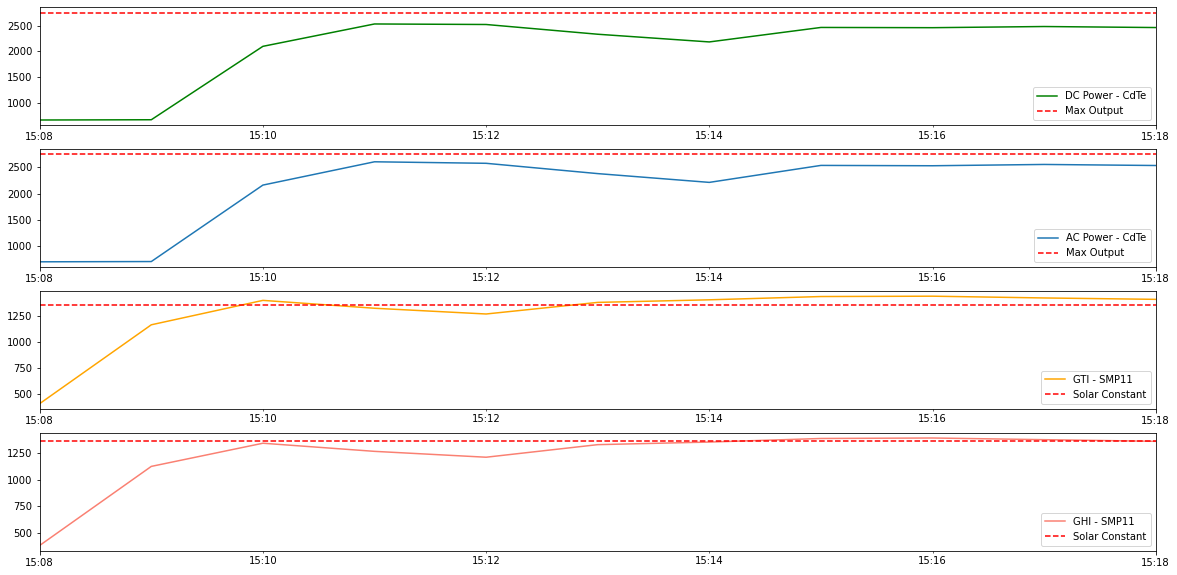

In [102]:
max_out = 2750
sc = 1361.1
figs_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/INVERTER/figs/"


fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

f1= pxir2['Pdccdt'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe')
l1=axes[0].axhline(max_out,color='red',ls='--')
l1.set_label('Max Output')
axes[0].legend(loc='best')

f2= pxir2['Paccdt'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe')
l2=axes[1].axhline(max_out,color='red',ls='--')
l2.set_label('Max Output')
axes[1].legend(loc='best')

f3 = pxir2['TGIP_SMP11_VENT'].loc[start:end].plot(ax=axes[2],color = 'orange',label='GTI - SMP11')
l3=axes[2].axhline(sc,color='red',ls='--')
l3.set_label('Solar Constant')
axes[2].legend(loc='best')

f4 = pxir2['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
l4=axes[3].axhline(sc,color='red',ls='--')
l4.set_label('Solar Constant')
axes[3].legend(loc='best')

figname =  figs_path +  'CdTe.jpeg'
fig.savefig(figname)


In [87]:
oie = start

In [103]:
delta = 30


In [106]:
s = str(delta)

In [107]:
s

'30'

In [108]:
deltas = [5,30]

### PLOTS:

max_out = 2750
sc = 1361.1


In [109]:
pxir = pd.read_pickle(inv_path  + 'PowervsIrrad.pkl')


In [110]:
pxir

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11
2018-01-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.823333,0,-2.200000,1
2018-01-01 00:01:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.800000,0,-2.183333,1
2018-01-01 00:02:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.800000,0,-2.185000,1
2018-01-01 00:03:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.890000,0,-2.246667,1
2018-01-01 00:04:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-1.105000,0,-2.650000,1
...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:55:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-1.100000,0,-4.770000,3
2020-12-31 23:56:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-1.100000,0,-4.776667,3
2020-12-31 23:57:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-1.103333,0,-4.793333,3
2020-12-31 23:58:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-1.100000,0,-4.800000,3


In [113]:
oielist = ['2020-01-10 14:52:00+00:00',	
           '2020-01-10 14:50:00+00:00',
           '2020-11-19 15:42:00+00:00']	
	
    


deltas = [5,30]

In [114]:
for oie in oielist:
       for delta in deltas:
              event = pd.to_datetime(oie)
              start = event - datetime.timedelta(minutes=delta)
              end = event + datetime.timedelta(minutes=delta)

              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdccdt'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Paccdt'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['TGIP_SMP11_VENT'].loc[start:end].plot(ax=axes[2],color = 'orange',label='GTI - SMP11')
              l3=axes[2].axhline(sc,color='red',ls='--')
              l3.set_label('Solar Constant')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd' + str(delta) + 'CdTe.jpeg'
              fig.savefig(figname)
              fig.clf()


              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdccdta'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe ARC')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Paccdta'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe ARC')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['TGIP_SMP11_VENT'].loc[start:end].plot(ax=axes[2],color = 'orange',label='GTI - SMP11')
              l3=axes[2].axhline(sc,color='red',ls='--')
              l3.set_label('Solar Constant')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd' + str(delta) + 'CdTeA.jpeg'
              fig.savefig(figname)
              fig.clf()

              
              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdcpsi'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - mcSi')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Pacpsi'].loc[start:end].plot(ax=axes[1],label='AC Power - mcSi')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['TGIP_SMP11_VENT'].loc[start:end].plot(ax=axes[2],color = 'orange',label='GTI - SMP11')
              l3=axes[2].axhline(sc,color='red',ls='--')
              l3.set_label('Solar Constant')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd'+ str(delta) + 'PSI.jpeg'
              fig.savefig(figname)
              fig.clf()


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [115]:

oielist = ['2019-02-05 14:25:00+00:00',	
           '2018-11-24 13:24:00+00:00',
           '2019-03-14 15:07:00+00:00']	#inverter worst eff  

In [116]:
for oie in oielist:
       for delta in deltas:
              event = pd.to_datetime(oie)
              start = event - datetime.timedelta(minutes=delta)
              end = event + datetime.timedelta(minutes=delta)

              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdccdt'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Paccdt'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['TGIP_SMP11_VENT'].loc[start:end].plot(ax=axes[2],color = 'orange',label='GTI - SMP11')
              l3=axes[2].axhline(sc,color='red',ls='--')
              l3.set_label('Solar Constant')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd' + str(delta) + 'CdTe.jpeg'
              fig.savefig(figname)
              fig.clf()


              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdccdta'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe ARC')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Paccdta'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe ARC')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['TGIP_SMP11_VENT'].loc[start:end].plot(ax=axes[2],color = 'orange',label='GTI - SMP11')
              l3=axes[2].axhline(sc,color='red',ls='--')
              l3.set_label('Solar Constant')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd' + str(delta) + 'CdTeA.jpeg'
              fig.savefig(figname)
              fig.clf()

              
              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdcpsi'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - mcSi')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Pacpsi'].loc[start:end].plot(ax=axes[1],label='AC Power - mcSi')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['TGIP_SMP11_VENT'].loc[start:end].plot(ax=axes[2],color = 'orange',label='GTI - SMP11')
              l3=axes[2].axhline(sc,color='red',ls='--')
              l3.set_label('Solar Constant')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd'+ str(delta) + 'PSI.jpeg'
              fig.savefig(figname)
              fig.clf()


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [118]:
oiee = pxir[pxir.TGIP_SMP11_VENT > sc]

In [119]:
oiee

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11
2018-01-11 15:46:00+00:00,1340.675,1301.710,1404.765,1361.864,1207.665,1171.4350,1443.550000,0,1533.716667,0
2018-01-11 15:47:00+00:00,1572.091,1524.176,1717.460,1667.643,1405.829,1363.6540,1403.716667,0,1497.266667,0
2018-01-11 15:48:00+00:00,2177.863,2112.527,2049.062,1982.278,1563.125,1515.6570,1450.166667,0,1563.933333,0
2018-01-11 15:54:00+00:00,1172.384,1137.212,1245.289,1207.930,1007.792,977.4946,1510.016667,0,1619.900000,0
2018-01-11 15:55:00+00:00,1190.558,1154.841,1295.557,1256.690,1061.538,1029.1820,1452.233333,0,1565.416667,0
...,...,...,...,...,...,...,...,...,...,...
2020-12-17 17:06:00+00:00,2296.093,2224.701,2350.216,2279.899,2118.950,2055.3820,1366.866667,0,1466.500000,0
2020-12-24 16:10:00+00:00,2037.092,1976.920,2079.933,2023.259,2123.188,2059.3650,1467.416667,0,1550.816667,0
2020-12-25 13:28:00+00:00,2488.315,2413.666,2540.271,2464.253,2545.798,2469.4240,1364.366667,0,1476.483333,0
2020-12-25 13:29:00+00:00,2485.728,2411.156,2565.307,2489.360,2529.635,2453.8410,1379.366667,0,1489.133333,0


In [120]:
oiee['effcdt'] = oiee.Paccdt / oiee.Pdccdt

<ipython-input-120-46fe2dce4433>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oiee['effcdt'] = oiee.Paccdt / oiee.Pdccdt


In [121]:
oiee

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,effcdt
2018-01-11 15:46:00+00:00,1340.675,1301.710,1404.765,1361.864,1207.665,1171.4350,1443.550000,0,1533.716667,0,0.970936
2018-01-11 15:47:00+00:00,1572.091,1524.176,1717.460,1667.643,1405.829,1363.6540,1403.716667,0,1497.266667,0,0.969521
2018-01-11 15:48:00+00:00,2177.863,2112.527,2049.062,1982.278,1563.125,1515.6570,1450.166667,0,1563.933333,0,0.970000
2018-01-11 15:54:00+00:00,1172.384,1137.212,1245.289,1207.930,1007.792,977.4946,1510.016667,0,1619.900000,0,0.970000
2018-01-11 15:55:00+00:00,1190.558,1154.841,1295.557,1256.690,1061.538,1029.1820,1452.233333,0,1565.416667,0,0.970000
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-17 17:06:00+00:00,2296.093,2224.701,2350.216,2279.899,2118.950,2055.3820,1366.866667,0,1466.500000,0,0.968907
2020-12-24 16:10:00+00:00,2037.092,1976.920,2079.933,2023.259,2123.188,2059.3650,1467.416667,0,1550.816667,0,0.970462
2020-12-25 13:28:00+00:00,2488.315,2413.666,2540.271,2464.253,2545.798,2469.4240,1364.366667,0,1476.483333,0,0.970000
2020-12-25 13:29:00+00:00,2485.728,2411.156,2565.307,2489.360,2529.635,2453.8410,1379.366667,0,1489.133333,0,0.970000


In [122]:
oiee['effcdta'] = oiee.Paccdta / oiee.Pdccdta

<ipython-input-122-6d7856e4c9b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oiee['effcdta'] = oiee.Paccdta / oiee.Pdccdta


In [123]:
oiee['effpsi'] = oiee.Pacpsi / oiee.Pdcpsi

<ipython-input-123-2d0355c87ab6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oiee['effpsi'] = oiee.Pacpsi / oiee.Pdcpsi


<AxesSubplot:>

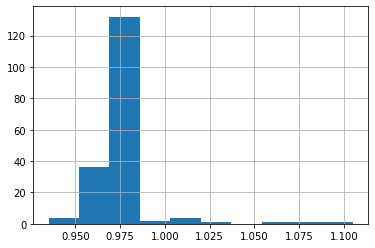

In [124]:
oiee['effcdt'].hist()

<AxesSubplot:>

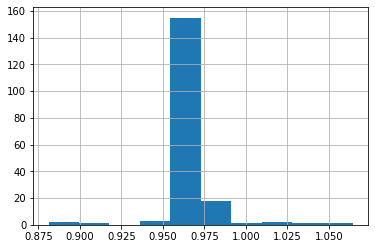

In [125]:
oiee['effcdta'].hist()

<AxesSubplot:>

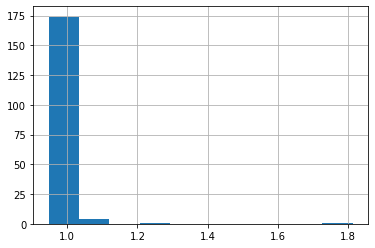

In [126]:
oiee['effpsi'].hist()

In [129]:
oiee[oiee['effpsi']>1]

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,effcdt,effcdta,effpsi
2018-02-08 15:06:00+00:00,1808.553,1751.536,2662.063,2582.201,1644.2040,1721.069,1435.666667,0,1445.783333,0,0.968474,0.970000,1.046749
2018-03-01 15:17:00+00:00,1046.844,1015.439,1064.036,1032.620,821.4548,1046.390,1369.640625,0,1314.750000,0,0.970000,0.970475,1.273825
2018-11-09 14:57:00+00:00,2573.042,2499.867,1926.031,1868.250,981.5105,1780.724,1377.300000,0,1429.933333,0,0.971561,0.970000,1.814269
2018-11-09 15:56:00+00:00,1724.731,1672.989,1839.251,1762.571,1902.6840,2066.312,1363.350000,0,1409.783333,0,0.970000,0.958309,1.085999
2019-02-02 14:40:00+00:00,1814.245,1770.985,2203.714,2143.104,1676.4640,1781.743,1376.133333,0,1407.350000,0,0.976155,0.972496,1.062798
2019-03-29 14:32:00+00:00,1384.203,1338.097,1820.083,1756.500,1704.7830,1818.581,1397.550000,0,1233.383333,0,0.966691,0.965066,1.066752
2019-03-29 16:00:00+00:00,1847.877,1792.441,1939.853,1876.346,1902.6840,1949.489,1391.850000,0,1246.950000,0,0.970000,0.967262,1.024599


In [130]:
oiee[oiee['effcdt']>1]

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,effcdt,effcdta,effpsi
2018-03-01 14:52:00+00:00,1997.4120,2207.1350,1710.6790,1626.9780,2176.605,2100.791,1408.366667,0,1330.183333,0,1.104997,0.951071,0.965169
2019-03-29 15:25:00+00:00,1922.0620,1991.4440,2501.0210,2425.9910,2443.825,2370.510,1411.133333,0,1252.496667,0,1.036098,0.970000,0.970000
2020-01-19 15:23:00+00:00,1882.8030,2028.5840,0.0000,0.0000,1979.688,1950.764,1397.166667,0,1440.216667,0,1.077428,NaN,0.985390
2020-10-17 14:29:00+00:00,957.0071,972.9033,985.9271,956.3494,1191.436,1155.693,1384.900000,0,1364.583333,0,1.016610,0.970000,0.970000
2020-11-03 13:51:00+00:00,2107.3540,2142.2640,1842.1200,1847.3170,1935.077,1862.366,1383.850000,0,1370.016667,0,1.016566,1.002821,0.962425
2020-11-03 14:16:00+00:00,1655.7200,1754.0770,1563.5680,1535.4970,1237.659,1204.735,1375.150000,0,1374.133333,0,1.059404,0.982047,0.973398
2020-11-12 14:56:00+00:00,2162.6960,2201.8650,1918.6960,1861.1360,1550.509,1503.994,1368.300000,0,1361.733333,0,1.018111,0.970000,0.970000
2020-11-23 14:56:00+00:00,1343.1330,1360.9960,1837.0670,1781.9550,1321.990,1282.330,1366.750000,0,1445.833333,0,1.013300,0.970000,0.970000


In [131]:
oiee[oiee['effcdta']>1]

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,effcdt,effcdta,effpsi
2018-03-03 15:10:00+00:00,1640.779,1591.556,2152.365,2198.569,1517.395,1480.540,1397.433333,0,1296.633333,0,0.970000,1.021467,0.975712
2018-12-07 15:23:00+00:00,1587.133,1541.994,2202.475,2226.775,1727.780,1678.878,1370.366667,0,1445.870000,0,0.971559,1.011033,0.971697
2019-03-29 15:37:00+00:00,2172.365,2107.006,2320.159,2469.628,2013.462,1953.058,1386.233333,0,1218.833333,0,0.969913,1.064422,0.970000
2020-10-16 13:38:00+00:00,1772.333,1717.470,1580.590,1645.066,1588.849,1568.046,1435.500000,0,1398.000000,0,0.969045,1.040792,0.986907
2020-11-03 13:51:00+00:00,2107.354,2142.264,1842.120,1847.317,1935.077,1862.366,1383.850000,0,1370.016667,0,1.016566,1.002821,0.962425


In [136]:
oiee['etacdt'] = oiee.Pdccdt/(oiee.TGIP_SMP11_VENT*14.4)

<ipython-input-136-350b5b3d1992>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oiee['etacdt'] = oiee.Pdccdt/(oiee.TGIP_SMP11_VENT*14.4)


In [137]:
oiee['etacdta'] = oiee.Pdccdta/(oiee.TGIP_SMP11_VENT*14.4) 

<ipython-input-137-5148786ecd6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oiee['etacdta'] = oiee.Pdccdta/(oiee.TGIP_SMP11_VENT*14.4)


In [138]:
oiee['etapsi'] =  oiee.Pdcpsi /(oiee.TGIP_SMP11_VENT*16.5)

<ipython-input-138-c90bfd5f3aab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oiee['etapsi'] =  oiee.Pdcpsi /(oiee.TGIP_SMP11_VENT*16.5)


In [139]:
oiee

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,effcdt,effcdta,effpsi,etacdt,etacdta,etapsi
2018-01-11 15:46:00+00:00,1340.675,1301.710,1404.765,1361.864,1207.665,1171.4350,1443.550000,0,1533.716667,0,0.970936,0.969460,0.970000,0.064495,0.067579,0.050703
2018-01-11 15:47:00+00:00,1572.091,1524.176,1717.460,1667.643,1405.829,1363.6540,1403.716667,0,1497.266667,0,0.969521,0.970994,0.970000,0.077774,0.084966,0.060697
2018-01-11 15:48:00+00:00,2177.863,2112.527,2049.062,1982.278,1563.125,1515.6570,1450.166667,0,1563.933333,0,0.970000,0.967408,0.969633,0.104292,0.098124,0.065327
2018-01-11 15:54:00+00:00,1172.384,1137.212,1245.289,1207.930,1007.792,977.4946,1510.016667,0,1619.900000,0,0.970000,0.970000,0.969937,0.053917,0.057270,0.040449
2018-01-11 15:55:00+00:00,1190.558,1154.841,1295.557,1256.690,1061.538,1029.1820,1452.233333,0,1565.416667,0,0.970000,0.970000,0.969520,0.056931,0.061952,0.044301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-17 17:06:00+00:00,2296.093,2224.701,2350.216,2279.899,2118.950,2055.3820,1366.866667,0,1466.500000,0,0.968907,0.970081,0.970000,0.116654,0.119404,0.093953
2020-12-24 16:10:00+00:00,2037.092,1976.920,2079.933,2023.259,2123.188,2059.3650,1467.416667,0,1550.816667,0,0.970462,0.972752,0.969940,0.096404,0.098431,0.087690
2020-12-25 13:28:00+00:00,2488.315,2413.666,2540.271,2464.253,2545.798,2469.4240,1364.366667,0,1476.483333,0,0.970000,0.970075,0.970000,0.126652,0.129296,0.113086
2020-12-25 13:29:00+00:00,2485.728,2411.156,2565.307,2489.360,2529.635,2453.8410,1379.366667,0,1489.133333,0,0.970000,0.970395,0.970038,0.125144,0.129151,0.111146


In [165]:
avgetacdt = oiee[oiee.etacdt > 0].mean()

In [167]:
avgetacdta = oiee[oiee.etacdta > 0].mean()

In [169]:
avgetapsi = oiee[oiee.etapsi > 0].mean()

In [166]:
avgetacdt = avgetacdt.etacdt

Pdccdt               2051.097477
Paccdt               1994.064338
Pdccdta              2089.559703
Paccdta              2026.793627
Pdcpsi               1989.736191
Pacpsi               1941.029894
TGIP_SMP11_VENT      1403.234552
F_TGIP_SMP11_VENT       0.000000
GHIP_SMP11           1390.805045
F_GHIP_SMP11            0.000000
effcdt                  0.972691
effcdta                 0.970075
effpsi                  0.979350
etacdt                  0.101589
etacdta                 0.103493
etapsi                  0.085977
dtype: float64

In [175]:
avgetacdt = avgetacdt.etacdt

In [176]:
avgetacdt

0.10158941837372716

In [179]:
gtimincdt = 2846.8/ (14.4*avgetacdt)


In [180]:
gtimincdt

1946.0141381769322

In [174]:
avgetacdta


0.10464739651838062

In [181]:
gtimincdta = 2846.8/ (14.4*avgetacdta)
gtimincdta

1889.1482351376103

In [170]:
avgetapsi

Pdccdt               2026.045661
Paccdt               1969.881331
Pdccdta              2100.302011
Paccdta              2037.149240
Pdcpsi               2036.535165
Pacpsi               1986.576704
TGIP_SMP11_VENT      1403.765688
F_TGIP_SMP11_VENT       0.000000
GHIP_SMP11           1393.093140
F_GHIP_SMP11            0.000000
effcdt                  0.972789
effcdta                 0.970044
effpsi                  0.979260
etacdt                  0.100321
etacdta                 0.103985
etapsi                  0.087983
dtype: float64

In [177]:
avgetapsi = avgetapsi.etapsi

In [178]:
avgetapsi

0.08798322145419384

In [182]:
gtiminpsi = 2846.8/ (14.4*avgetapsi)
gtiminpsi

2246.9561943394956

<AxesSubplot:xlabel='Pdccdt', ylabel='etacdt'>

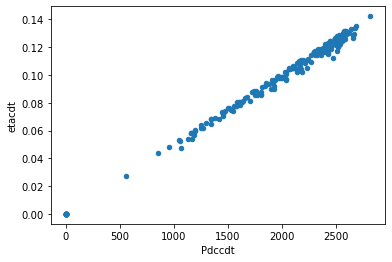

In [147]:
oiee.plot.scatter('Pdccdt', 'etacdt')

<AxesSubplot:xlabel='TGIP_SMP11_VENT', ylabel='etacdt'>

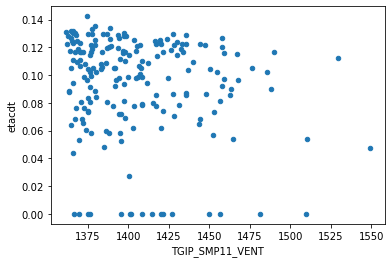

In [148]:
oiee.plot.scatter('TGIP_SMP11_VENT', 'etacdt')

In [149]:
pxir['etacdt']= pxir.Pdccdt/(pxir.TGIP_SMP11_VENT*14.4)

In [154]:
pxir = pxir[pxir.etacdt>0]

In [158]:
pxir = pxir[pxir.etacdt<2]

<AxesSubplot:xlabel='TGIP_SMP11_VENT', ylabel='etacdt'>

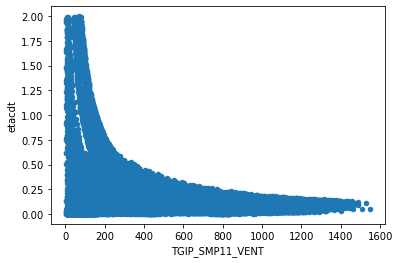

In [159]:
pxir.plot.scatter('TGIP_SMP11_VENT', 'etacdt')

In [186]:
pxir.Paccdt.max()

2737.014

In [190]:
pxir[pxir.Paccdt ==pxir.Paccdt.max()]

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
2020-11-19 15:42:00+00:00,2819.724,2737.014,1478.049,1497.457,1363.909,1322.992,945.566667,0,1028.195,0,0.207087


In [202]:
pxir.loc['2020-11-19 15:10:00+00:00':'2020-11-19 16:00:00+00:00']

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
2020-11-19 15:10:00+00:00,415.9463,403.0915,431.8661,419.1631,467.0459,452.4609,202.473333,0,225.636667,0,0.142662
2020-11-19 15:11:00+00:00,404.4983,392.3634,423.0968,410.1194,455.3506,440.1604,208.245000,0,223.420000,0,0.134890
2020-11-19 15:12:00+00:00,409.1875,396.9119,425.0528,411.8585,457.2560,443.5383,220.813333,0,228.638333,0,0.128687
2020-11-19 15:13:00+00:00,429.0111,416.1408,438.5490,425.3925,467.6372,453.6082,224.796667,0,225.323333,0,0.132531
2020-11-19 15:14:00+00:00,442.9492,429.6607,460.6841,446.9268,491.4879,476.7433,223.705000,0,217.570000,0,0.137504
2020-11-19 15:15:00+00:00,444.3721,431.0410,459.6734,445.8833,490.7651,476.0422,214.115000,0,202.200000,0,0.144124
2020-11-19 15:16:00+00:00,428.7524,415.8899,441.3851,428.1436,471.6452,457.4958,197.200000,0,181.250000,0,0.150986
2020-11-19 15:17:00+00:00,398.0306,386.1211,400.7010,388.6800,434.7194,421.6778,168.548333,0,153.608333,0,0.163995
2020-11-19 15:18:00+00:00,345.0272,335.0529,344.6299,334.2910,380.9076,369.4804,139.228333,0,132.218333,0,0.172093
2020-11-19 15:19:00+00:00,269.3544,263.1559,333.4156,323.4132,312.7723,303.3891,122.328333,0,126.751667,0,0.152910


In [191]:
pxir.Paccdta.max()

2741.889

In [192]:
pxir[pxir.Paccdta ==pxir.Paccdta.max()]

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
2020-01-10 14:51:00+00:00,2196.619,2093.329,2821.8,2741.889,1439.206,1396.03,883.845,0,929.178333,0,0.17259


In [199]:
pxir.loc['2020-01-10 14:30:00+00:00':'2020-01-10 15:00:00+00:00']

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
2020-01-10 14:30:00+00:00,1617.8830,1568.3430,1885.2820,1729.8750,2124.7650,2061.0220,766.973333,0,815.761667,0,0.146489
2020-01-10 14:31:00+00:00,1712.5070,1655.4850,1297.3170,1258.3980,1566.6070,1519.6090,621.033333,0,675.781667,0,0.191494
2020-01-10 14:32:00+00:00,1608.0520,1544.1270,1742.4960,1690.2210,1349.8490,1313.1770,543.431667,0,586.826667,0,0.205491
2020-01-10 14:33:00+00:00,1116.8260,1083.3210,1231.3360,1194.3960,1177.4410,1144.0290,501.675000,0,546.926667,0,0.154597
2020-01-10 14:34:00+00:00,1069.9340,1037.8360,1100.1560,1067.1510,1039.9870,1010.3170,529.538333,0,572.791667,0,0.140313
2020-01-10 14:35:00+00:00,1024.1430,992.2891,1086.7900,1054.1860,1067.7140,1036.4480,521.138333,0,563.935000,0,0.136472
2020-01-10 14:36:00+00:00,1024.1430,994.9240,1065.8610,1033.3790,1083.8120,1051.2980,486.200000,0,529.228333,0,0.146279
2020-01-10 14:37:00+00:00,1010.2370,980.1807,1008.7470,978.2314,1022.9040,992.2170,493.886667,0,533.500000,0,0.142047
2020-01-10 14:38:00+00:00,984.8185,955.2740,994.3377,964.5076,951.2864,922.7479,471.583333,0,507.973333,0,0.145022
2020-01-10 14:39:00+00:00,912.5090,884.6318,1003.5310,973.4249,993.5344,963.7921,472.693333,0,512.985000,0,0.134059


In [193]:
pxir.Pacpsi.max()

2743.986

In [194]:
pxir[pxir.Pacpsi ==pxir.Pacpsi.max()]

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
2019-09-23 16:15:00+00:00,1536.584,1487.287,2618.705,2536.982,2821.756,2743.986,946.183333,0,859.941667,0,0.112776


In [200]:
pxir['2019-09-23 16:00:00+00:00':'2019-09-23 16:30:00+00:00']

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
2019-09-23 16:00:00+00:00,1621.376,1570.1000,1631.2670,1581.6960,1660.367,1610.556,864.688333,0,796.015000,0,0.130215
2019-09-23 16:01:00+00:00,1722.467,1668.1580,1624.1600,1575.1190,1737.635,1685.506,809.906667,0,750.806667,0,0.147691
2019-09-23 16:02:00+00:00,1676.287,1625.8110,1569.9800,1522.8800,1596.437,1548.990,787.225000,0,727.616667,0,0.147872
2019-09-23 16:03:00+00:00,1510.195,1464.7010,1520.0370,1473.2980,1603.993,1556.638,861.796667,0,795.381667,0,0.121693
2019-09-23 16:04:00+00:00,1548.808,1502.3430,1511.8220,1464.1910,1507.407,1459.126,812.883333,0,754.605000,0,0.132314
2019-09-23 16:05:00+00:00,1561.420,1516.4590,1649.9140,1600.4160,1746.703,1694.301,774.536667,0,723.378333,0,0.139996
2019-09-23 16:06:00+00:00,1460.717,1418.5890,1495.1960,1450.3400,1582.310,1534.841,774.400000,0,727.268333,0,0.130990
2019-09-23 16:07:00+00:00,1503.210,1463.7600,1454.7080,1411.3830,1531.455,1485.512,739.446667,0,696.570000,0,0.141173
2019-09-23 16:08:00+00:00,1493.702,1425.9290,1444.8630,1403.0980,1482.177,1437.712,745.495000,0,701.961667,0,0.139142
2019-09-23 16:09:00+00:00,1369.909,1328.8120,1421.9130,1379.2550,1517.263,1471.745,738.760000,0,695.045000,0,0.128773


In [195]:
oiee[oiee.Paccdt ==oiee.Paccdt.max()]

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,effcdt,effcdta,effpsi,etacdt,etacdta,etapsi
2018-01-31 15:55:00+00:00,2817.524,2732.999,1643.654,1593.08,2307.817,2275.803,1374.655738,0,1391.704918,0,0.97,0.969231,0.986128,0.142335,0.083034,0.101747


In [196]:
oiee[oiee.Paccdta ==oiee.Paccdta.max()]

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,effcdt,effcdta,effpsi,etacdt,etacdta,etapsi
2020-01-10 14:52:00+00:00,2573.56,2417.304,2825.712,2733.352,1398.141,1353.329,1375.283333,0,1453.1,0,0.939284,0.967314,0.967949,0.129951,0.142683,0.061613


In [197]:
oiee[oiee.Pacpsi ==oiee.Pacpsi.max()]

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,effcdt,effcdta,effpsi,etacdt,etacdta,etapsi
2020-01-10 14:50:00+00:00,1675.123,1623.928,2011.768,1953.818,2825.304,2739.397,1379.838333,0,1452.771667,0,0.969438,0.971194,0.969594,0.084306,0.101248,0.124095


In [203]:
oielist = ['2020-11-19 15:42:00+00:00',	
           '2020-01-10 14:51:00+00:00',
           '2019-09-23 16:15:00+00:00']   #inverter highest ac power peaks	

In [204]:
for oie in oielist:
       for delta in deltas:
              event = pd.to_datetime(oie)
              start = event - datetime.timedelta(minutes=delta)
              end = event + datetime.timedelta(minutes=delta)

              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdccdt'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Paccdt'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['TGIP_SMP11_VENT'].loc[start:end].plot(ax=axes[2],color = 'orange',label='GTI - SMP11')
              l3=axes[2].axhline(sc,color='red',ls='--')
              l3.set_label('Solar Constant')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd' + str(delta) + 'CdTe.jpeg'
              fig.savefig(figname)
              fig.clf()


              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdccdta'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe ARC')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Paccdta'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe ARC')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['TGIP_SMP11_VENT'].loc[start:end].plot(ax=axes[2],color = 'orange',label='GTI - SMP11')
              l3=axes[2].axhline(sc,color='red',ls='--')
              l3.set_label('Solar Constant')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd' + str(delta) + 'CdTeA.jpeg'
              fig.savefig(figname)
              fig.clf()

              
              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdcpsi'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - mcSi')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Pacpsi'].loc[start:end].plot(ax=axes[1],label='AC Power - mcSi')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['TGIP_SMP11_VENT'].loc[start:end].plot(ax=axes[2],color = 'orange',label='GTI - SMP11')
              l3=axes[2].axhline(sc,color='red',ls='--')
              l3.set_label('Solar Constant')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd'+ str(delta) + 'PSI.jpeg'
              fig.savefig(figname)
              fig.clf()


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>